In [53]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 1000

In [54]:
full_dataset = pd.read_csv(r'US_Accidents_Dec21_updated.csv')

In [55]:
print(full_dataset)

                ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.11206

In [56]:
# Analyze values in column "Severity" (impact on traffic)
filtered_data = full_dataset[full_dataset["Severity"]==2]
print(filtered_data)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(full_dataset["Severity"].unique())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
# null values
print(full_dataset["Severity"].isnull().sum())

                ID  Severity           Start_Time             End_Time  \
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
5              A-6         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
6              A-7         2  2016-02-08 08:15:41  2016-02-08 14:15:41   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
1         39.86542  -84.06280  39.86501  -8

In [57]:
all_types = full_dataset.dtypes
print(all_types)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [58]:
# Analyze values in column "Start_Time"
# null values
print(full_dataset["Start_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["Start_Time"] = pd.to_datetime(full_dataset["Start_Time"])
print(full_dataset["Start_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]


In [59]:
# Analyze values in column "End_Time"
# null values
print(full_dataset["End_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["End_Time"] = pd.to_datetime(full_dataset["End_Time"])
print(full_dataset["End_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2845337   2019-08-23 18:32:01
2845338   2019-08-23 19:38:23
2845339   2019-08-23 19:28:49
2845340   2019-08-23 19:29:42
2845341   2019-08-23 19:21:31
Name: End_Time, Length: 2845342, dtype: datetime64[ns]



Difference of end time and start time :
 0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2845337   0 days 00:28:36
2845338   0 days 00:26:53
2845339   0 days 00:28:28
2845340   0 days 00:29:21
2845341   0 days 00:29:25
Name: duration, Length: 2845342, dtype: timedelta64[ns]


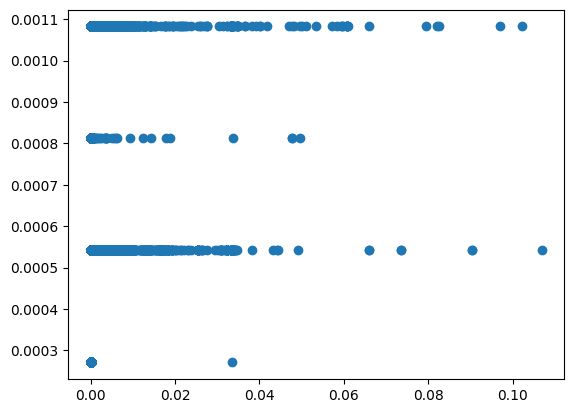

In [60]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
  


# create column incidents duration (difference between end time and start time)
full_dataset['duration'] = full_dataset['End_Time'] - full_dataset['Start_Time']
print("\nDifference of end time and start time :\n", full_dataset['duration'])

duration_normalized = preprocessing.normalize([np.array(full_dataset['duration'])])
severity_normalized = preprocessing.normalize([np.array(full_dataset['Severity'])])

  
plt.scatter(duration_normalized, severity_normalized)
plt.show()


In [61]:
# check null values for latitude and longitude
print("Null values for 'Start_Lat'",full_dataset["Start_Lat"].isnull().sum())
print("Null values for 'Start_Lng'",full_dataset["Start_Lng"].isnull().sum())
print("Null values for 'End_Lat'",full_dataset["End_Lat"].isnull().sum())
print("Null values for 'End_Lng'",full_dataset["End_Lng"].isnull().sum())

# convert latitude and longitude to another type??? --> check software behaviours!

Null values for 'Start_Lat' 0
Null values for 'Start_Lng' 0
Null values for 'End_Lat' 0
Null values for 'End_Lng' 0


Null values for 'Distance' 0


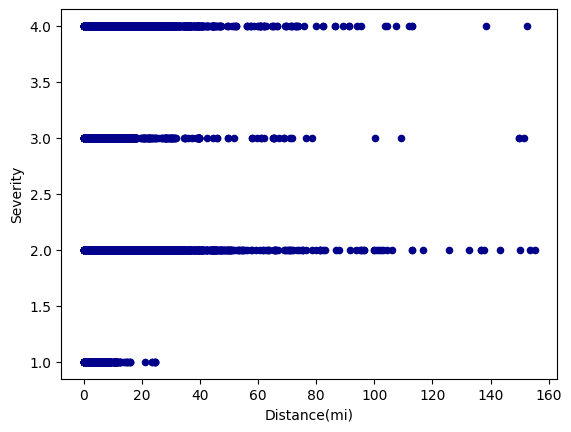

In [62]:
#!pip install matplotlib
#import matplotlib.pyplot as plt
#full_dataset.plot(x='ID', y='Severity')


# check null values for distance
print("Null values for 'Distance'",full_dataset["Distance(mi)"].isnull().sum())

ax2 = full_dataset.plot.scatter(x='Distance(mi)',y='Severity',c='DarkBlue')

In [63]:
# delete attribute "description"

full_dataset.drop('Description', inplace=True, axis=1)
print(full_dataset) # 47 columns now

                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  Number  \
0        40.108910  -83.092860  40.112060  -83.031870   

In [64]:
# Analyze values in column "Number"
# null values
print("Null values: ")
print(full_dataset["Number"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

# delete attribute "Number"
full_dataset.drop('Number', inplace=True, axis=1)
print(full_dataset) # 46 columns now

Null values: 
1743911
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_L

In [65]:
# Analyze values in column "Street"
# null values
print("Null values: ")
print(full_dataset["Street"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
# delete attribute "Street"
full_dataset.drop('Street', inplace=True, axis=1)
print(full_dataset) # 45 columns now

Null values: 
2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    

In [66]:
# Analyze values in column "Side"
# null values
print("Null values: ")
print(full_dataset["Side"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

Null values: 
0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [67]:
# check null values for City, County, State, Zipcode
print("Null values for 'City': ",full_dataset["City"].isnull().sum())
print("Null values for 'County': ",full_dataset["County"].isnull().sum())
print("Null values for 'State': ",full_dataset["State"].isnull().sum())
print("Null values for 'Zipcode': ",full_dataset["Zipcode"].isnull().sum())

Null values for 'City':  137
Null values for 'County':  0
Null values for 'State':  0
Null values for 'Zipcode':  1319


In [68]:
#Removing rows with null values for 'City'
full_dataset = full_dataset.dropna(subset = ["City"], how = 'all')
print("Null values for 'City': ",full_dataset["City"].isnull().sum())

#Removing column "Zipcode" 
full_dataset.drop('Zipcode', inplace=True, axis=1)
print(full_dataset) # 44 columns now


Null values for 'City':  0


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/2086982679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Zipcode', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [69]:
#Country. In this dataset all rows are referred to US, so we delete this column.
#Removing column "Country" 
full_dataset.drop('Country', inplace=True, axis=1)
print(full_dataset) # 43 columns now

/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/853330033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Country', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [70]:
#Removing column "Timezone" 
full_dataset.drop('Timezone', inplace=True, axis=1)
print(full_dataset) # 42 columns now

/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/1299452802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Timezone', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [71]:
# check unique values of 'Airport_Code'
print(full_dataset["Airport_Code"].unique().size)

#Removing column "Airport_Code" 
full_dataset.drop('Airport_Code', inplace=True, axis=1)
print(full_dataset) # 41 columns now

2005


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/4117377266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Airport_Code', inplace=True, axis=1)


                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [72]:
from datetime import timedelta
# Analysis of attribute "Weather_Timestamp"

# attributes = full_dataset.dtypes
# print(attributes)


# check null values
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Wind_Chill(F)': ",full_dataset["Wind_Chill(F)"].isnull().sum())
print("Null values for 'Humidity(%)': ",full_dataset["Humidity(%)"].isnull().sum())
print("Null values for 'Pressure(in)': ",full_dataset["Pressure(in)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",full_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())


# try to delete rows where attribute "Precipitatios" is null -> the re-check null values for weather fields

new_dataset = full_dataset.dropna(subset = ['Weather_Timestamp','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition'], how = 'any', inplace=False)
print("Null values for 'Weather_Timestamp': ",new_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",new_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Wind_Chill(F)': ",new_dataset["Wind_Chill(F)"].isnull().sum())
print("Null values for 'Humidity(%)': ",new_dataset["Humidity(%)"].isnull().sum())
print("Null values for 'Pressure(in)': ",new_dataset["Pressure(in)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",new_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",new_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",new_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",new_dataset["Weather_Condition"].isnull().sum())

print(new_dataset)

# conversion from generic object to data type
full_dataset["Weather_Timestamp"] = pd.to_datetime(full_dataset["Weather_Timestamp"])
# print(full_dataset.dtypes)

#  PROVA EVENTUALMENTE DA CONVERTIRE SU FULL DATASET
full_dataset.dropna(subset = ['Weather_Timestamp'], how = 'all', inplace=True)
full_dataset['deltaTimeWeather'] = abs(full_dataset['Weather_Timestamp'] - full_dataset['Start_Time'])
print("\nDifference of Weather_Timestamp and start time :\n", full_dataset['deltaTimeWeather'])

mean = full_dataset['deltaTimeWeather'].mean()
print("mean: ", mean)

# print(try_dataset['deltaTimeWeather'])
# mean = try_dataset['deltaTimeWeather'].mean()
# print("mean: ", mean)


Null values for 'Weather_Timestamp':  50735
Null values for 'Temperature(F)':  69271
Null values for 'Wind_Chill(F)':  469614
Null values for 'Humidity(%)':  73089
Null values for 'Pressure(in)':  59196
Null values for 'Visibility(mi)':  70541
Null values for 'Wind_Speed(mph)':  157933
Null values for 'Precipitation(in)':  549436
Null values for 'Weather_Condition':  70630
Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  0
Null values for 'Wind_Chill(F)':  0
Null values for 'Humidity(%)':  0
Null values for 'Pressure(in)':  0
Null values for 'Visibility(mi)':  0
Null values for 'Wind_Speed(mph)':  0
Null values for 'Precipitation(in)':  0
Null values for 'Weather_Condition':  0
                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
7              A-8         2 2016-02-08 11:51:46 2016-02-08 17:51:46   

/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/1768182621.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset["Weather_Timestamp"] = pd.to_datetime(full_dataset["Weather_Timestamp"])



Difference of Weather_Timestamp and start time :
 0         0 days 00:15:52
1         0 days 00:01:40
2         0 days 00:22:39
3         0 days 00:02:15
4         0 days 00:00:43
                ...      
2845337   0 days 00:10:25
2845338   0 days 00:18:30
2845339   0 days 00:07:21
2845340   0 days 00:09:21
2845341   0 days 01:57:54
Name: deltaTimeWeather, Length: 2794470, dtype: timedelta64[ns]
mean:  0 days 00:16:31.834951529


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/1768182621.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.dropna(subset = ['Weather_Timestamp'], how = 'all', inplace=True)
/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/1768182621.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset['deltaTimeWeather'] = abs(full_dataset['Weather_Timestamp'] - full_dataset['Start_Time'])


In [73]:
full_dataset.drop('Wind_Chill(F)', inplace=True, axis=1)
full_dataset.drop('Humidity(%)', inplace=True, axis=1)
full_dataset.drop('Pressure(in)', inplace=True, axis=1)
full_dataset.drop('Wind_Direction', inplace=True, axis=1)

print(full_dataset) # 38 columns now

/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/3312347997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Wind_Chill(F)', inplace=True, axis=1)
/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/3312347997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Humidity(%)', inplace=True, axis=1)
/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/3312347997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

                ID  Severity          Start_Time            End_Time  \
0              A-1         3 2016-02-08 00:37:08 2016-02-08 06:37:08   
1              A-2         2 2016-02-08 05:56:20 2016-02-08 11:56:20   
2              A-3         2 2016-02-08 06:15:39 2016-02-08 12:15:39   
3              A-4         2 2016-02-08 06:51:45 2016-02-08 12:51:45   
4              A-5         3 2016-02-08 07:53:43 2016-02-08 13:53:43   
...            ...       ...                 ...                 ...   
2845337  A-2845338         2 2019-08-23 18:03:25 2019-08-23 18:32:01   
2845338  A-2845339         2 2019-08-23 19:11:30 2019-08-23 19:38:23   
2845339  A-2845340         2 2019-08-23 19:00:21 2019-08-23 19:28:49   
2845340  A-2845341         2 2019-08-23 19:00:21 2019-08-23 19:29:42   
2845341  A-2845342         2 2019-08-23 18:52:06 2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi) Side  ...  \
0        40.108910  -83.092860  40.112060  -83.031870 

In [74]:
# check null values
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Precipitation(in)': ",full_dataset["Precipitation(in)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())

#too many null values in 'Precipitation(in)'. We decided to remove this column.
full_dataset.drop('Precipitation(in)', inplace=True, axis=1)

#delete rows with null values on the following attributes:
full_dataset.dropna(subset = ["Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition"], how = 'any', inplace=True)

# check 
print("Null values for 'Weather_Timestamp': ",full_dataset["Weather_Timestamp"].isnull().sum())
print("Null values for 'Temperature(F)': ",full_dataset["Temperature(F)"].isnull().sum())
print("Null values for 'Visibility(mi)': ",full_dataset["Visibility(mi)"].isnull().sum())
print("Null values for 'Wind_Speed(mph)': ",full_dataset["Wind_Speed(mph)"].isnull().sum())
print("Null values for 'Weather_Condition': ",full_dataset["Weather_Condition"].isnull().sum())


Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  18536
Null values for 'Visibility(mi)':  19806
Null values for 'Wind_Speed(mph)':  107198
Null values for 'Precipitation(in)':  498701
Null values for 'Weather_Condition':  19895


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/494338032.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.drop('Precipitation(in)', inplace=True, axis=1)


Null values for 'Weather_Timestamp':  0
Null values for 'Temperature(F)':  0
Null values for 'Visibility(mi)':  0
Null values for 'Wind_Speed(mph)':  0
Null values for 'Weather_Condition':  0


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_93632/494338032.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset.dropna(subset = ["Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition"], how = 'any', inplace=True)


In [75]:
# Check null values for Weather_Condition
print('Null values for Weather_Condition: ', full_dataset['Weather_Condition'].isnull().sum())

print(full_dataset["Weather_Condition"].unique())
print(full_dataset["Weather_Condition"].unique().size)


print(full_dataset.groupby(['Weather_Condition'])['Weather_Condition'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False))

# remove rows with  "N/A Precipitation" as Weather_Condition because data not available is like null
full_dataset = full_dataset.drop(full_dataset.index[full_dataset['Weather_Condition'] == 'N/A Precipitation'], inplace = False)

# check 
print('#################################################')
print(full_dataset["Weather_Condition"].unique().size)
print(full_dataset.groupby(['Weather_Condition'])['Weather_Condition'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False))


# group values in column "Weather_Conditions" in "Fair", "Cloudy", "Rain", "Snow", "Fog", "Windy", "Storm"
# dust in fog because not too much rows and simili effects
# ice pellets in snow because not too much rows and simil temperatures and maybe simil effects on the road (ice on road)

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Thunder in the Vicinity', 'T-Storm', 'Thunder', ' Light Rain with Thunder', 
'Heavy T-Storm', 'Light Rain with Thunder', 'Light Thunderstorms and Rain', 'Thunderstorm', 'Heavy Thunderstorms and Rain', 'Thunderstorms and Rain',
'Heavy T-Storm / Windy', 'T-Storm / Windy', 'Thunder / Windy', 'Squalls / Windy', 'Squalls', 'Light Snow with Thunder', 'Tornado',
'Light Thunderstorms and Snow', 'Thunder / Wintry Mix', 'Heavy Snow with Thunder', 'Heavy Thunderstorms and Snow', 'Thunder and Hail',
'Funnel Cloud', 'Thunder / Wintry Mix / Windy', 'Snow and Thunder / Windy', 'Thunder and Hail / Windy', 'Heavy Thunderstorms with Small Hail'],'Storm')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Light Snow', 'Wintry Mix', 'Light Snow / Windy', 'Heavy Snow', 'Snow / Windy',
'Heavy Snow / Windy', 'Blowing Snow', 'Snow and Sleet', 'Blowing Snow / Windy', 'Wintry Mix / Windy',
'Light Ice Pellets', 'Light Sleet', 'Sleet', 'Light Snow and Sleet', 'Ice Pellets', 'Small Hail', 'Light Snow Shower',
'Snow and Sleet / Windy', 'Light Snow and Sleet / Windy', 'Heavy Sleet', 'Snow/Ice Pellets', 'Snow Grains', 'Light Sleet / Windy',
'Light Snow Showers', 'Hail', 'Blowing Snow Nearby', 'Light Blowing Snow', 'Heavy Ice Pellets', 'Sleet / Windy', 'Low Drifting Snow',
'Heavy Blowing Snow', 'Drifting Snow', 'Snow'],'Snow/Hail')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Haze', 'Smoke', 'Patches of Fog', 'Shallow Fog', 'Mist', 'Haze / Windy',
'Fog / Windy', 'Light Freezing Fog', 'Drizzle and Fog', 'Smoke / Windy', 'Blowing Dust / Windy', 'Blowing Dust', 'Widespread Dust',
'Partial Fog', 'Widespread Dust / Windy', 'Sand / Dust Whirlwinds', 'Fog/Dust', 'Patches of Fog / Windy', 'Sand / Windy', 'Blowing Sand',
'Sand / Dust Whirlwinds / Windy', 'Sand / Dust Whirls Nearby', 'Light Haze', 'Dust Whirls', 'Light Fog', 'Fog'],'Fog/Dust')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Light Rain', 'Heavy Rain', 'Light Drizzle', 
'Light Rain / Windy', 'Drizzle', 'Rain / Windy', 'Light Freezing Rain', 'Heavy Rain / Windy', 'Showers in the Vicinity',
'Light Freezing Drizzle', 'Light Rain Shower', 'Heavy Drizzle', 'Light Drizzle / Windy', 'Freezing Rain', 'Rain Shower',
'Light Rain Showers', 'Light Freezing Rain / Windy', 'Rain Showers', 'Freezing Drizzle', 'Drizzle / Windy',
'Light Rain Shower / Windy', 'Heavy Rain Shower', 'Freezing Rain / Windy', 'Heavy Freezing Drizzle', 'Heavy Rain Showers', 'Heavy Rain Shower / Windy',
'Heavy Freezing Rain'],'Rain')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Fair / Windy', 'Cloudy / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy'],'Windy')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace(['Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],'Cloudy')

full_dataset['Weather_Condition'] = full_dataset['Weather_Condition'].replace('Clear','Fair')



print('#################################################')
print(full_dataset["Weather_Condition"].unique().size)
print(full_dataset.groupby(['Weather_Condition'])['Weather_Condition'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False))

Null values for Weather_Condition:  0
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy'
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Mist' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Freezing Rain / Windy' 'Sm

In [76]:
#check null values on the following attributes:
print("Null values for 'Amenity': ",full_dataset["Amenity"].isnull().sum())
print("Null values for 'Bump': ",full_dataset["Bump"].isnull().sum())
print("Null values for 'Crossing': ",full_dataset["Crossing"].isnull().sum())
print("Null values for 'Give_Way': ",full_dataset["Give_Way"].isnull().sum())
print("Null values for 'Junction': ",full_dataset["Junction"].isnull().sum())
print("Null values for 'No_Exit': ",full_dataset["No_Exit"].isnull().sum())
print("Null values for 'Railway': ",full_dataset["Railway"].isnull().sum())
print("Null values for 'Roundabout': ",full_dataset["Roundabout"].isnull().sum())
print("Null values for 'Station': ",full_dataset["Station"].isnull().sum())
print("Null values for 'Stop': ",full_dataset["Stop"].isnull().sum())
print("Null values for 'Traffic_Calming': ",full_dataset["Traffic_Calming"].isnull().sum())
print("Null values for 'Traffic_Signal': ",full_dataset["Traffic_Signal"].isnull().sum())
print("Null values for 'Turning_Loop': ",full_dataset["Turning_Loop"].isnull().sum())

#There are no null values. We remove useless attributes for the analysis.
#full_dataset.drop('Amenity', inplace=True, axis=1)
#full_dataset.drop('Bump', inplace=True, axis=1)
#full_dataset.drop('Give_Way', inplace=True, axis=1)
#full_dataset.drop('No_Exit', inplace=True, axis=1)
#full_dataset.drop('Railway', inplace=True, axis=1)
#full_dataset.drop('Roundabout', inplace=True, axis=1)
#full_dataset.drop('Station', inplace=True, axis=1)
#full_dataset.drop('Turning_Loop', inplace=True, axis=1)



Null values for 'Amenity':  0
Null values for 'Bump':  0
Null values for 'Crossing':  0
Null values for 'Give_Way':  0
Null values for 'Junction':  0
Null values for 'No_Exit':  0
Null values for 'Railway':  0
Null values for 'Roundabout':  0
Null values for 'Station':  0
Null values for 'Stop':  0
Null values for 'Traffic_Calming':  0
Null values for 'Traffic_Signal':  0
Null values for 'Turning_Loop':  0


In [77]:
#code to check how many rows belonging to 'True' are remained.
full_dataset.groupby(['Stop'])['Stop'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

,Stop,Count
0,False,2614498
1,True,47765


In [78]:
#We already consider 'Sunrise_Sunset' to distinguish between nocturnal and daytime accidents, so we remove these fields.

#full_dataset.drop('Civil_Twilight', inplace=True, axis=1)
#full_dataset.drop('Nautical_Twilight', inplace=True, axis=1)
#full_dataset.drop('Astronomical_Twilight', inplace=True, axis=1)